In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [3]:

data['processed_text'] = data['review']

In [29]:
import fasttext

model = fasttext.train_supervised('output_lower.csv')
data['vec'] = data['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [30]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9989078640937805, 'ikke'),
 (0.9979522824287415, 'd.'),
 (0.9978132843971252, 'nu'),
 (0.9974405765533447, 'stadig'),
 (0.9973520040512085, ',dårlig'),
 (0.9973394870758057, 'sendt'),
 (0.9967580437660217, ',elendig'),
 (0.9965688586235046, 'bliver'),
 (0.9958666563034058, 'ordre'),
 (0.995199978351593, 'fejl')]

In [31]:
model.get_nearest_neighbors('utilfreds')

[(0.9125660061836243, 'ifbm.'),
 (0.9118562936782837, 'står'),
 (0.9113478064537048, 'fejl'),
 (0.9109591245651245, 'andet'),
 (0.9106699824333191, 'dages'),
 (0.9104760885238647, 'anden'),
 (0.9103866815567017, 'sender'),
 (0.9101014733314514, ',skuffet'),
 (0.9099316596984863, ',ringe'),
 (0.9097381830215454, ',elendig')]

In [32]:
model.get_nearest_neighbors('glad')

[(0.9831419587135315, ',hurtig'),
 (0.9689555764198303, 'fint'),
 (0.9683085083961487, 'dog'),
 (0.9667792916297913, 'synes'),
 (0.9610219597816467, 'lidt'),
 (0.9605114459991455, 'fragt'),
 (0.9516960382461548, 'pakker'),
 (0.9470149278640747, 'man'),
 (0.9445191025733948, ',fin'),
 (0.9345752000808716, ',nem')]

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [21]:
print(data['cluster'])

0       4
1       3
2       3
3       1
4       0
       ..
5059    3
5060    3
5061    1
5062    2
5063    2
Name: cluster, Length: 5064, dtype: int32


In [22]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)

[ 425 2281  586  753 1019]


In [23]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [13]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

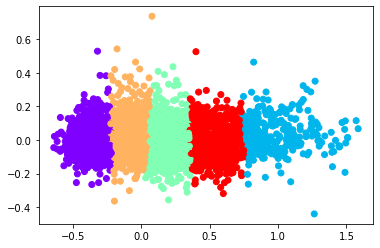

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow')

Text(0.5, 0.92, 'Review Clustering using K Means')

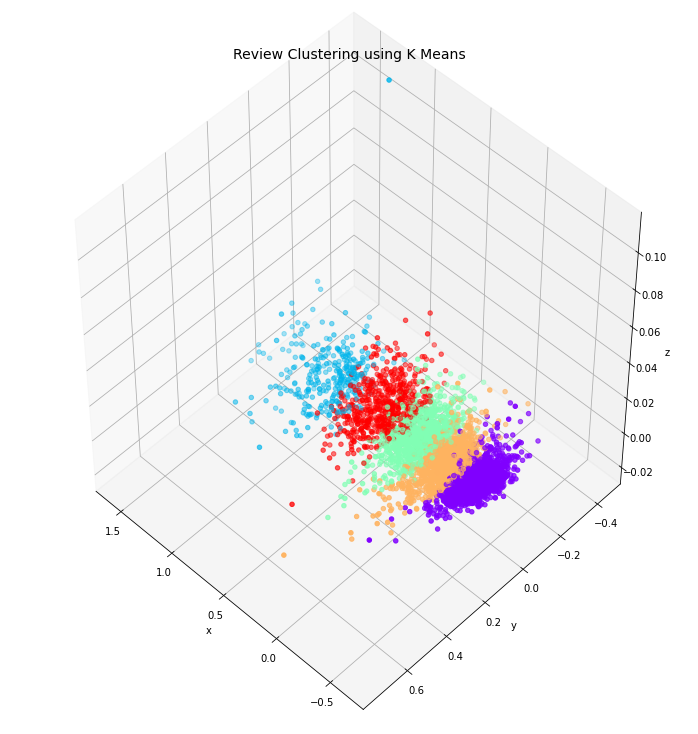

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)